---

# IOD - Mini Project 3 - Catboost

---

The purpose of this project is to practice using the [Catboost](https://catboost.ai/) package for the purpose of binary classification.

The dataset for this project can be found [here](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

Further points:
- Random State = 46
- Test Size = 0.2
- Focus on hyperparameters learning_rate & depth

## Libraries Installation

In [1]:
# !pip install --user --upgrade catboost
# !pip install --user --upgrade ipywidgets
# !pip install shap
# !pip install sklearn
# !pip install --upgrade numpy
# !jupyter nbextension enable --py widgetsnbextension

In [2]:
import catboost
print(catboost.__version__)
!python --version

1.0.6
Python 3.8.8


## Reading Data

In [3]:
# Import Modules

import pandas as pd
import numpy as np
import catboost
from catboost import CatBoostClassifier, cv, Pool
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from show_summary_report import show_summary_report

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Read in data

df = pd.read_csv('datasets/attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

This will be very breif, as the purpose of this notebook is to explore the Catboost algorithm. We will visualise all the variables individually, though won't go into exploring relationships between variables.

In [5]:
# Shape & Info & Describe

display(df.shape)
display(df.info())
display(df.describe().T)

(1470, 35)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


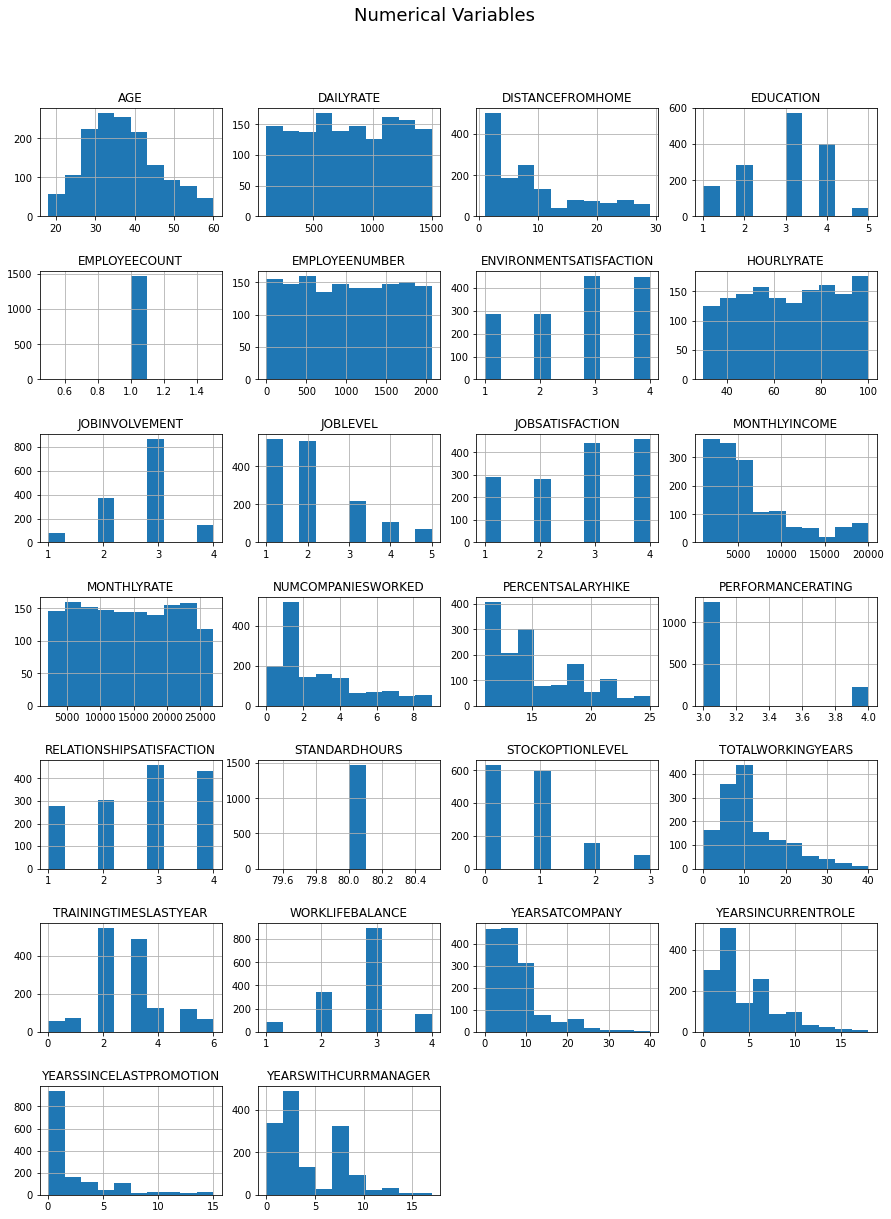

In [6]:
## Overview of variables with Dtype = int/float

# Create list of columns with int/float dtype

cols = list(df.describe().T.index.values)

# Instantiate figure

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Numerical Variables", fontsize=18, y=0.95)

# Loop through the length of columns and keep track of index

for n, col in enumerate(cols):
    # Add a new subplot iteratively
    ax = plt.subplot(7,4, n+1)
    
    # Plot histogram on new subplot
    df[col].hist(ax=ax)
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

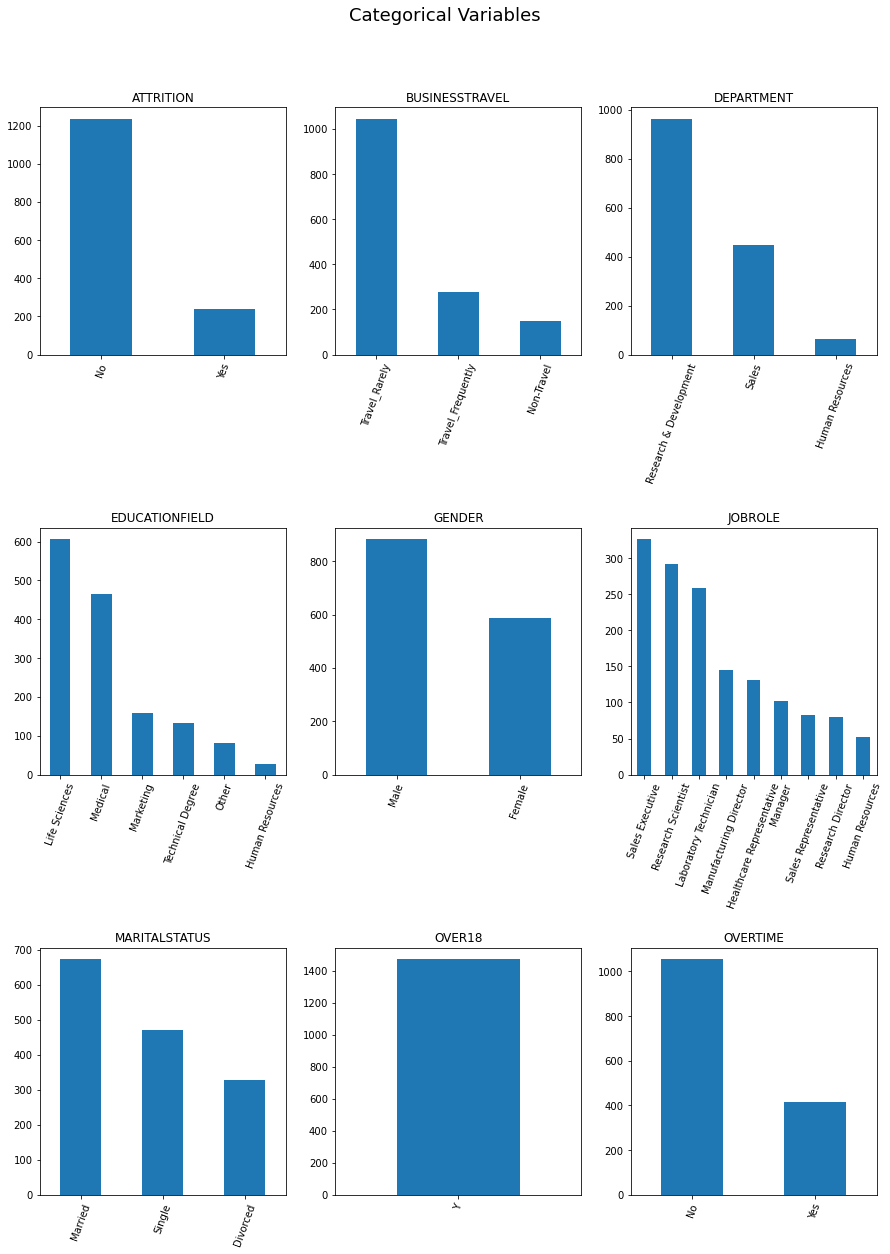

In [7]:
## Overview of variables with Dtype = object

# Create list of columns with object dtype

cols_ob = list(df.select_dtypes(include=['object']).columns)

# Instantiate figure

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.7)
plt.suptitle("Categorical Variables", fontsize=18, y=0.95)

# Loop through the length of columns and keep track of index

for n, col in enumerate(cols_ob):
    # Add a new subplot iteratively
    ax = plt.subplot(3,3, n+1)
    
    # Plot histogram on new subplot
    df[col].value_counts().plot.bar(ax=ax)
    
    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")
    ax.tick_params(axis='x', labelrotation = 70)

## Data Preperation

In [8]:
# Convert Attrition (Target Variable) columns to 0 = No & 1 = Yes

df.Attrition = df.Attrition.apply(lambda x: 0 if x == 'No' else 1)

In [9]:
# Set y and X variables

y = df.Attrition
X = df.drop('Attrition', axis=1)

# Declare categorical features

cat_features_names = ['BusinessTravel',
                     'Department',
                     'EducationField',
                     'Gender',
                     'JobRole',
                     'MaritalStatus',
                     'Over18',
                     'OverTime']

cat_features = [X.columns.get_loc(col) for col in cat_features_names]

In [10]:
# Check Target Variable Balance

print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 1233, One count = 237


As we have data that isn't balanced, we'll be using the F1 score as our evaluation metric.

## Data Split

In [11]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46, stratify=y)

In [103]:
# Check Target Variable Balance

print('Labels: {}'.format(set(y_train)))
print('Zero count = {}, One count = {}'.format(len(y_train) - sum(y_train), sum(y_train)))

Labels: {0, 1}
Zero count = 986, One count = 190


## Cross Validation

In [12]:
# # Set Parameters
# params = {'loss_function': 'Logloss',
#          'cat_features': cat_features,
#          'random_seed': 46,
#          'verbose': 200,
#          'early_stopping_rounds': 200,
#          'eval_metric': 'F1'}

# # Create Pool class
# all_train_data = Pool(data=X_train,
#                       label=y_train,
#                       cat_features=cat_features
#                      )

# # Run 5 Fold Validation
# cv_scores = cv(pool=all_train_data,
#             params=params, 
#             fold_count=5,
#             seed=46,
#             shuffle=True,
#             stratified=True)

In [13]:
# print('Best validation F1 score: {:.2f}±{:.2f} on step {}'.format(
#     np.max(cv_scores['test-F1-mean']),
#     cv_scores['test-F1-std'][np.argmax(cv_scores['test-F1-mean'])],
#     np.argmax(cv_scores['test-F1-mean'])
# ))

In [14]:
# print('Precise validation F1 score: {}'.format(np.max(cv_scores['test-F1-mean'])))

In [15]:
# print('Average of Mean F1 Score: ', np.mean(cv_scores['test-F1-mean']))

From this initial check, it's clear that the imbalanced data is impacting the F1 score. This'll need to be addressed.

## Model Fit - #1

In [16]:
%%time

# Set Parameters
params = {'cat_features': cat_features,
         'random_seed': 46,
         'verbose': 200,
         'early_stopping_rounds': 200,
         'eval_metric': 'F1'}

# Model
model = CatBoostClassifier(**params)

# Fit
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

Learning rate set to 0.032984
0:	learn: 0.1502347	test: 0.0400000	best: 0.0400000 (0)	total: 205ms	remaining: 3m 25s
200:	learn: 0.8198758	test: 0.2758621	best: 0.2758621 (176)	total: 7.79s	remaining: 31s
400:	learn: 0.9617486	test: 0.3050847	best: 0.3389831 (251)	total: 15.3s	remaining: 22.9s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.3389830508
bestIteration = 251

Shrink model to first 252 iterations.
CPU times: total: 27.1 s
Wall time: 17.3 s


In [17]:
# Train Predictions
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 0.9524 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7053 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9900                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.8272
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


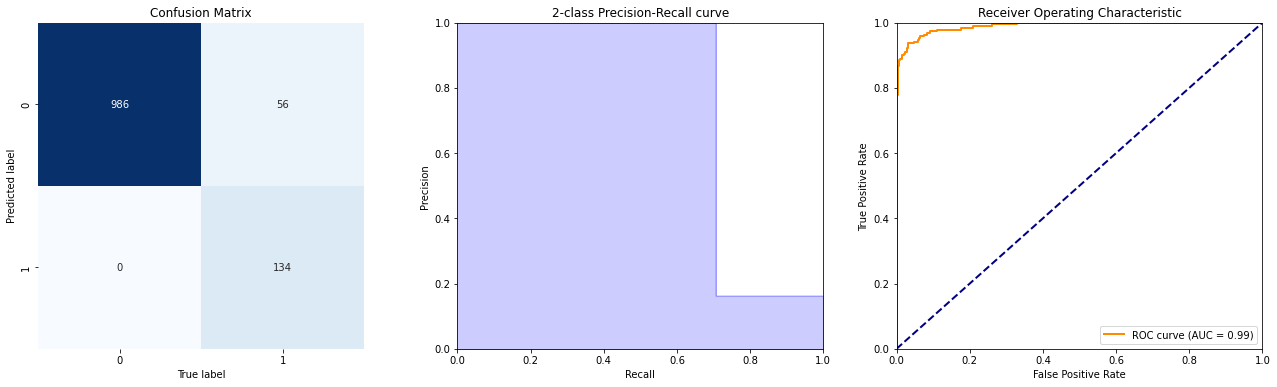

In [18]:
# Display Train Results
show_summary_report(y_train, y_train_pred, y_train_prob)

In [19]:
# Test Predictions
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.8673 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8333 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2128 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7898                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.3390
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


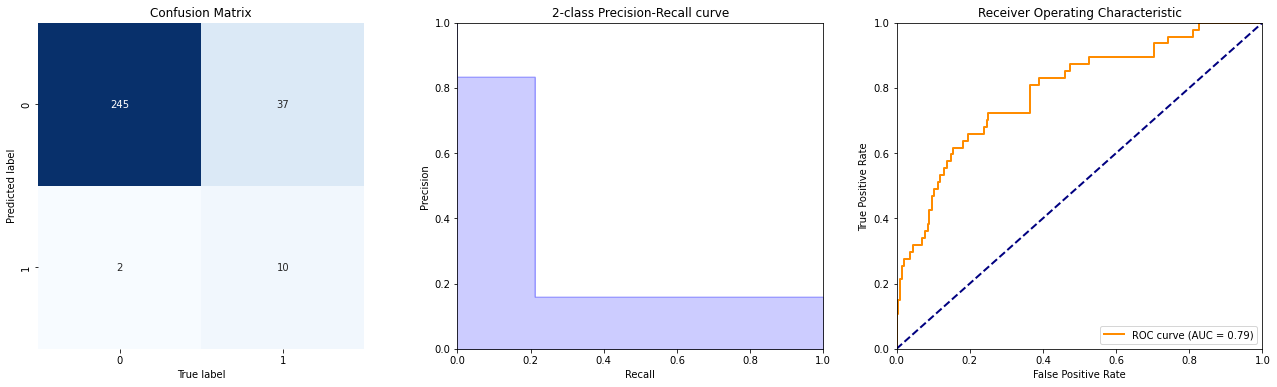

In [20]:
# Display Test Results
show_summary_report(y_test, y_test_pred, y_test_prob)

## Hyperparameter Tuning

In [21]:
# # Params
# params = params = {'cat_features': cat_features,
#          'random_seed': 46,
#          'verbose': 200,
#           'early_stopping_rounds': 200,
#          'eval_metric': 'F1'}

# # Model
# model = CatBoostClassifier(**params)

# # Param Grid

# grid = {'learning_rate': np.linspace(0.1, 0.4, 50),
#        'depth': range(1, 5)}

# grid_search_result = model.grid_search(grid,
#                                        X=X_train,
#                                        y=y_train)

In [22]:
# # Check best parameters

# grid_search_result['params']

## Model Fit - #2

In [23]:
%%time

# Set Parameters
params = {'cat_features': cat_features,
         'random_seed': 46,
         'verbose': 200,
         'early_stopping_rounds': 200,
         'learning_rate': 0.363265306122449,
         'depth': 1,
         'eval_metric': 'F1'}

# Model
model = CatBoostClassifier(**params)

# Fit
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.43ms	remaining: 1.43s
200:	learn: 0.6666667	test: 0.3943662	best: 0.4117647 (110)	total: 1.15s	remaining: 4.59s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4117647059
bestIteration = 110

Shrink model to first 111 iterations.
CPU times: total: 3.56 s
Wall time: 1.88 s


In [24]:
# Train Predictions
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 0.9039 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8812 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4684 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9040                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.6117
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


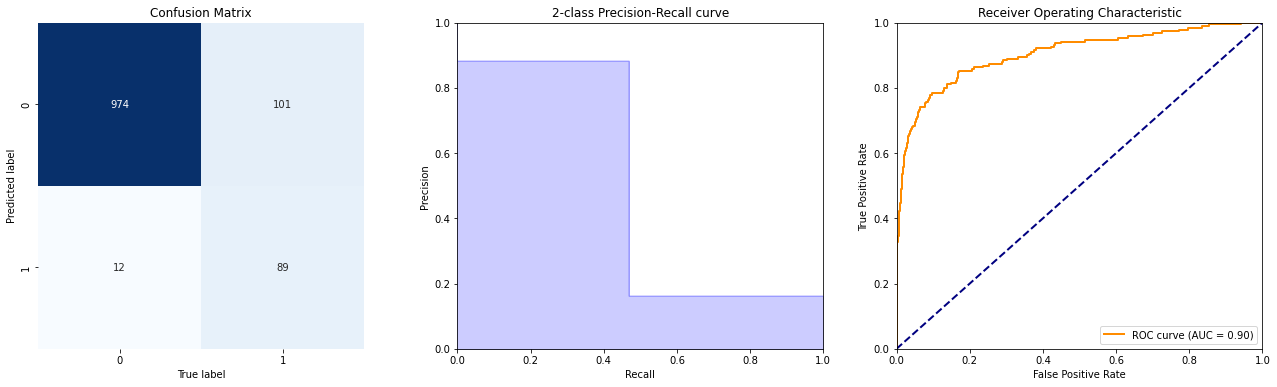

In [25]:
# Display Train Results
show_summary_report(y_train, y_train_pred, y_train_prob)

In [26]:
# Test Predictions
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.8639 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6667 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2979 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8120                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.4118
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


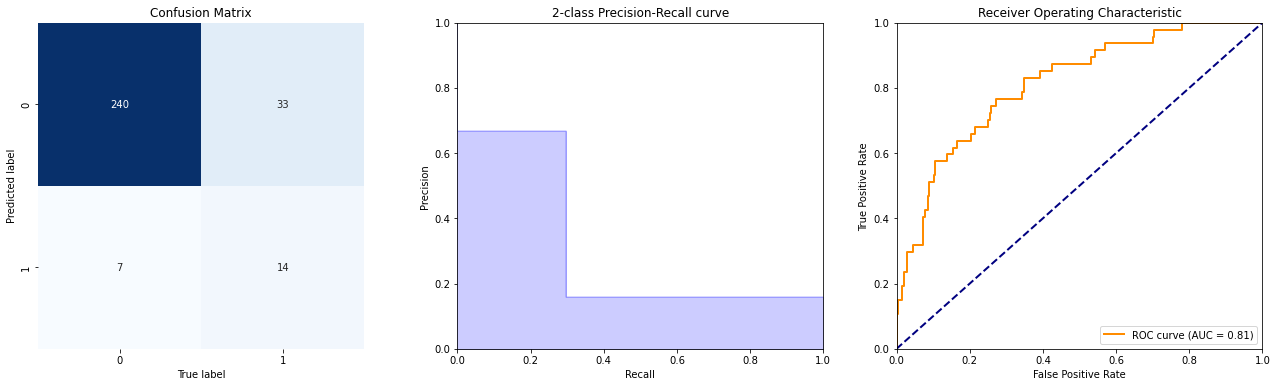

In [27]:
# Display Test Results
show_summary_report(y_test, y_test_pred, y_test_prob)

---

#### Data Imbalance

We've only managed to achieve a F1 score of 0.4118 on the Unseen Data... We'd be better of flipping a coin at this stage. In order to address this, we'll need to explore some techniques when dealing with imbalanced data. As we're sticking with the Catboost algorithm for the purpose of this assignment, we'll look into some resampling techniques to try improve our F1 score and make this a somewhat respectable model.

---

## Model Fit - #3

In [108]:
%%time

# Set Parameters
params = {'cat_features': cat_features,
         'random_seed': 46,
         'verbose': 200,
         'early_stopping_rounds': 200,
         'learning_rate': 0.34,
         'depth': 1,
         'eval_metric': 'F1:use_weights=False',
         'custom_metric': ['F1', 'Precision', 'Recall'],
         'scale_pos_weight': 5}

# Model
model = CatBoostClassifier(**params)

# Fit
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 0.3750000	test: 0.3333333	best: 0.3333333 (0)	total: 1.24ms	remaining: 1.24s
200:	learn: 0.6707317	test: 0.4812030	best: 0.4812030 (197)	total: 1.1s	remaining: 4.37s
400:	learn: 0.7119342	test: 0.4566929	best: 0.4881890 (335)	total: 2.26s	remaining: 3.37s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4881889764
bestIteration = 335

Shrink model to first 336 iterations.
CPU times: total: 7.89 s
Wall time: 3.16 s


In [109]:
# Train Predictions
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 0.8793 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5833 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8842 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9487                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.7029
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


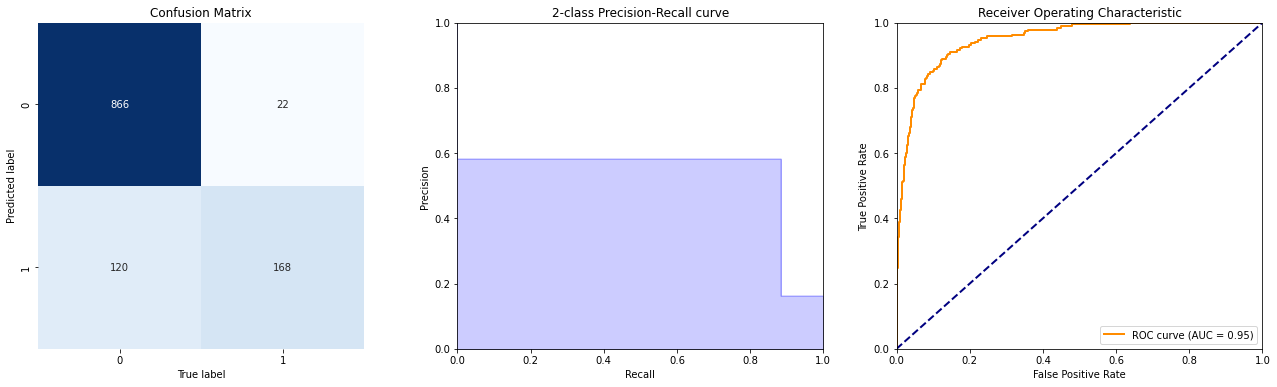

In [110]:
# Display Train Results
show_summary_report(y_train, y_train_pred, y_train_prob)

In [111]:
# Test Predictions
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 0.7789 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3875 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6596 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7686                                                                     Best: 1, Worst: < 0.5
F1 Score : 0.4882
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


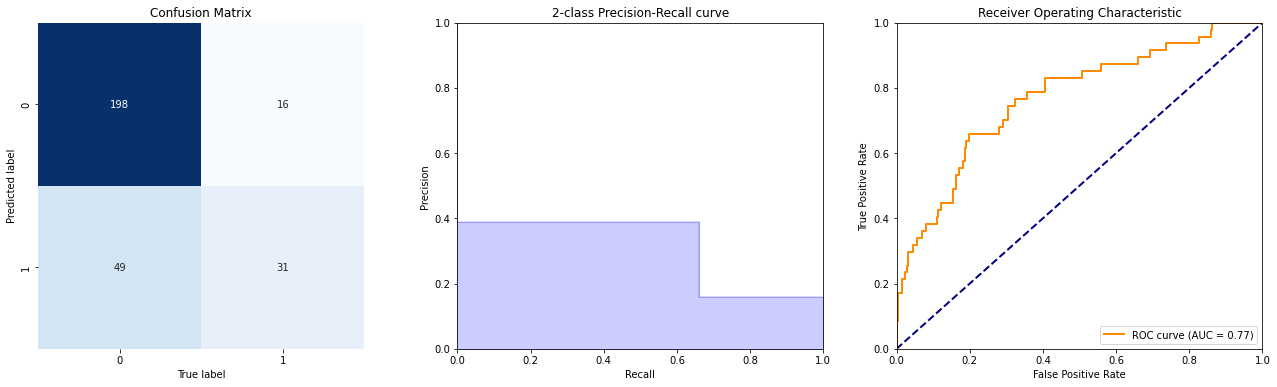

In [112]:
# Display Test Results
show_summary_report(y_test, y_test_pred, y_test_prob)